<a href="https://colab.research.google.com/github/vsham05/RussianNewsClassifier/blob/main/news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('news_dataset.csv')
df2 = pd.read_csv('news_dataset_2.csv')

df = pd.concat([df, df2])
df.describe()

,text,topic
count,3206,3206
unique,3178,4
top,Регулярный чемпионат НХЛ.,sport
freq,3,806


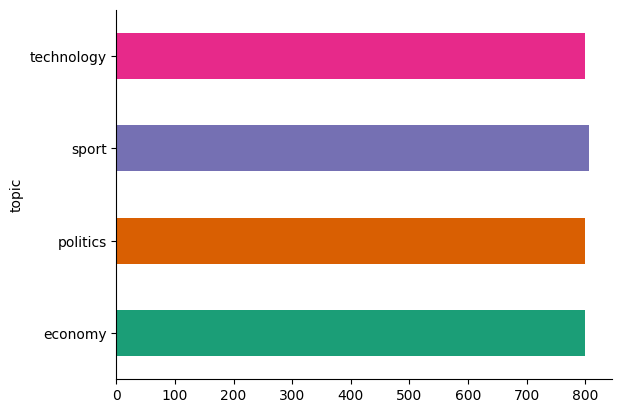

In [ ]:
# @title topic

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['length'] = df['text'].apply(lambda x: len(x))
df['length'].mean(), df['length'].max()

(75.5159076731129, 254)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
with open('stop_words.txt', 'r') as file:
    stop_words = list(map(lambda x: x[:-1], file.readlines())) + ['.', ',', ':', '"', '№', '%']



In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")

In [ ]:
import re

def some_fixes(df):
    df['text'] = df['text'].apply(lambda x: x.capitalize())
    df['text'] = df['text'].apply(lambda x: x.split('.')[0])
    df['text'] = df['text'].apply(lambda x: ' '.join(i for i in x.split() if i not in stop_words))
    df['text'] = df['text'].apply(lambda x: ' '.join(stemmer.stem(i) for i in x.split()))
    df['text'] = df['text'].apply(lambda x: x.replace(',', ''))
    df['text'] = df['text'].apply(lambda x: x.replace(')', ''))
    df['text'] = df['text'].apply(lambda x: x.replace('(', ''))
    df['text'] = df['text'].apply(lambda x: x.replace(':', ''))
    df['text'] = df['text'].apply(lambda x: x.replace('»', ''))
    df['text'] = df['text'].apply(lambda x: x.replace('«', ''))
    df['text'] = df['text'].apply(lambda x: x.replace('.', ''))
    df['text'] = df['text'].apply(lambda x: x.replace('-', ''))
    df['text'] = df['text'].apply(lambda x: ''.join(i for i in x if i.lower() not in 'qwertyuiopasdfghjklzxcvbnm»«1234567890'))



In [ ]:
some_fixes(df)
df

,text,topic,length
0,почт сотрудник связной выплат зарплат,technology,59
1,мегафон предлож абонент заплат побольш,technology,48
2,к систем антифрод подключ половин телекомоператор,technology,71
3,оператор внесут бюджет млрд рубл лтечастот,technology,55
4,оператор ищут нов способ защит мобильн номер угон,technology,62
...,...,...,...
795,представител чимаев отреагирова информац поеди...,sport,79
796,ян подня четверт рейтинг легчайш вес,sport,62
797,уайт сдела заявлен будущ макгрегор,sport,48
798,эксчемпион бокс пакья разреш выступ олимпиад п...,sport,79


In [ ]:
import re

dictionary = set()
for e in df['text']:
    e = re.sub('[,./!?]', '', e)
    e = e.lower().split()

    for word in e:
        if word not in stop_words:
            dictionary.add(stemmer.stem(word))



In [ ]:
from math import log

def idf_vectorizer(texts, dictionary):
    res = {}
    n = len(texts)
    for word in dictionary:

        word = word
        res[word] = 0
        for text in texts:
            if word in text:
                res[word] += 1

        if res[word] != 0:
            res[word] = log(n / res[word])

    return res


def result_vectorizer(text, dictionary, idf_dict):
    res = {}
    for word in dictionary:

        word = word
        idf = 1
        if word in idf_dict:
            idf = idf_dict[word]
        res[word.lower()] = text.count(word.lower()) * idf

    return res






In [ ]:
texts = df['text'].values
topics = df['topic'].values

In [ ]:
idf = idf_vectorizer(texts, dictionary)

In [ ]:
tf_vectors = []
for i, text in enumerate(texts):
    topic = topics[i]
    word_vector = result_vectorizer(text, list(dictionary), idf).values()
    tf_vectors.append(list(word_vector) + [topic])



In [ ]:
vec_df = pd.DataFrame(tf_vectors, columns= list(dictionary) + ['topic'])

In [ ]:
vec_df.describe()

,водител,волатильн,дег,ольм,родин,подавл,российскоукраинск,сдел,зор,контрольн,...,финал,высочеств,проверк,регион,инфляц,антикоррупцион,приз,мин,дес,подмосковн
count,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,...,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000
mean,0.025170,0.002526,0.004617,0.002526,0.008367,0.002526,0.002526,0.042679,0.042679,0.004617,...,0.023795,0.002526,0.013416,0.079240,0.036742,0.002526,0.078332,0.193904,0.034279,0.006545
std,0.366544,0.142759,0.184520,0.142759,0.236355,0.142759,0.142759,0.446004,0.446004,0.184520,...,0.358728,0.142759,0.286352,0.549957,0.422400,0.142759,0.547970,0.694445,0.411741,0.213534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.361292,8.069342,7.376195,8.069342,6.683048,8.069342,8.069342,4.702047,4.702047,7.376195,...,5.430285,8.069342,6.123432,3.894955,4.891289,8.069342,3.910459,5.228043,4.978300,6.970730


In [ ]:
X = vec_df.iloc[:, :-1]
y = vec_df.iloc[:, -1]

from sklearn.preprocessing import normalize

X = normalize(X, norm='l2')

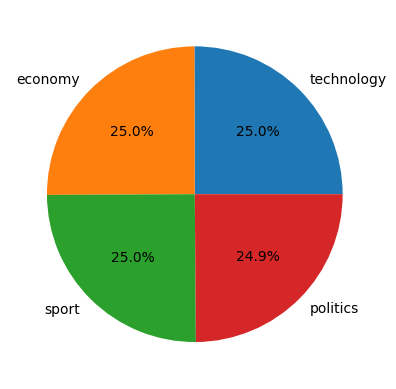

In [ ]:
import matplotlib.pyplot as plt

plt.pie(y.value_counts(), labels=y.unique(), autopct='%1.1f%%')

plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model= GaussianNB(var_smoothing=0.4)
model.fit(X_train, y_train)


GaussianNB(var_smoothing=0.4)

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.846


In [ ]:
model= GaussianNB(var_smoothing=0.4)
model.fit(X, y)

test_df = pd.read_csv('test_data.csv')

some_fixes(test_df)

texts = test_df['text'].values
topics = test_df['topic'].values

idf = idf_vectorizer(texts, dictionary)
tf_vectors = []
r = []
for e in topics:
    if e == 'tech':
        e = 'technology'
    if e == 'polit':
        e = 'politics'
    r.append(e)
topics = np.array(r)
for i, text in enumerate(texts):
    topic = topics[i]
    word_vector = result_vectorizer(text, list(dictionary), idf).values()
    tf_vectors.append(list(word_vector) + [topic])
vec_df = pd.DataFrame(tf_vectors, columns= list(dictionary) + ['topic'])


X_test = vec_df.iloc[:, :-1]
y_test = vec_df.iloc[:, -1]
X_test = normalize(X_test, norm='l2')


FileNotFoundError: [Errno 2] No such file or directory: 'test_news_dataset.csv'

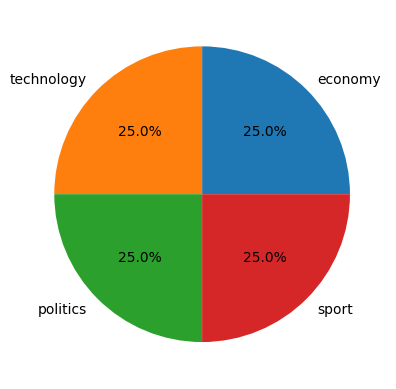

In [ ]:
import matplotlib.pyplot as plt

plt.pie(y_test.value_counts(), labels=y_test.unique(), autopct='%1.1f%%')

plt.show()

In [ ]:
y_pred = model.predict(X_test)


accuracy: 0.71


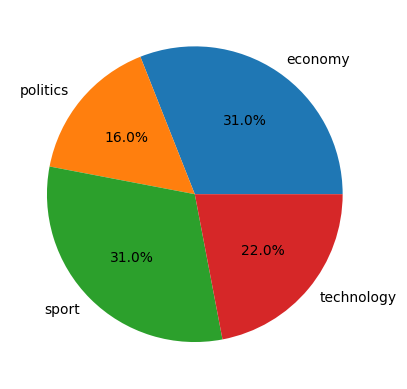

In [ ]:
from sklearn.metrics import accuracy_score

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

plt.pie(np.unique(y_pred, return_counts=True)[1], labels=np.unique(y_pred, return_counts=True)[0], autopct='%1.1f%%')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.71


In [ ]:
for i, e in enumerate(texts):
    if y_test[i] != y_pred[i]:
        print(e, y_test[i], y_pred[i])

млн полотно сам дорог картин мир economy politics
сам дорог город жизн economy sport
сам дорог мест земле выгляд избранных economy politics
сам дорог школ economy technology
дом случа апокалипсис выстав продаж economy technology
зоолог обнаруж нов вид древн паука мимикрир мурав technology economy
перв подводн раскопки проведен залив турецк зон моря откр археолог территор древн порта существова назад сообща порта technology sport
учен университет обнаружили кож африканск сом  присутств слизь способн производ противомикробн соединен technology politics
амазонк плем женщинвоительниц греческ миф могл существова действительности вероятн прототип кочевницы обита technology sport
на пляж побереж обнаруж миллион необычн прозрачн существ technology sport
в результат крупн вспышк течен нескольк дне повышен магнитн активн technology economy
пресссекретар президент заяв интерв сайт факты способ перспектив конкурирова произойдет вопрос закрыт последн неактуал technology sport
официальн представител

In [ ]:

news = ['Минцифры проработает идею обязать госкомпании перейти на облачные сервисы',
        'Боррель заявил, что ЕС не пойдет «умирать за Донбасс»',
        'Сборная России объявила стартовый состав на товарищеский матч с Сербией',
        'Песков прокомментировал возможность визита премьера Индии в Россию',
        'Сенаторы США предложили ужесточить правила покупки нефти для госкомпаний КНР',
        'В Госдуме хотят обязать операторов ЦФА интегрироваться друг с другом',
        ]

for new in news:

    print(new, '|', model.predict(np.array(list(result_vectorizer(new, dictionary, idf).values())).reshape(1, -1))[0])

Минцифры проработает идею обязать госкомпании перейти на облачные сервисы | technology
Боррель заявил, что ЕС не пойдет «умирать за Донбасс» | politics
Сборная России объявила стартовый состав на товарищеский матч с Сербией | sport
Песков прокомментировал возможность визита премьера Индии в Россию | sport
Сенаторы США предложили ужесточить правила покупки нефти для госкомпаний КНР | technology
В Госдуме хотят обязать операторов ЦФА интегрироваться друг с другом | politics


In [ ]:
vec_df.to_csv('vec_news.csv')